Cryptography

Tagging along with Polylog and Gemini

References:

[I can prove I’ve solved this Sudoku without revealing it - Polylog](https://youtu.be/Otvcbw6k4eo?si=0PMUnGsDrkqXEeVc)

Tutor:

Google's Gemini Advanced - 2.0 Flash Thinking

This is a very simplified demonstration. A real zero-knowledge proof would involve more sophisticated cryptographic techniques to ensure that the prover cannot cheat and that the verifier learns nothing beyond the truth of the statement.

--- Zero-Knowledge Proof for Graph Coloring ---

Prover's Commitment (hashes of colors for each node):
['5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91b46729d73a27fb57e9', '6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b', 'd4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35', '6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b', '5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91b46729d73a27fb57e9', '6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b']

Verifier challenges the prover to reveal the colors of edge: (4, 5)
Prover reveals:
  Node 4: Color = red, Hash = 5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91b46729d73a27fb57e9
  Node 5: Color = green, Hash = 6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b

Verifier checks the proof:
  Hash for Node 4 matches commitment: True
  Hash for Node 5 matches commitment: True
  Revealed colors for Node 4 and Node 5 are different: True

Verifier is convinced (for this edge

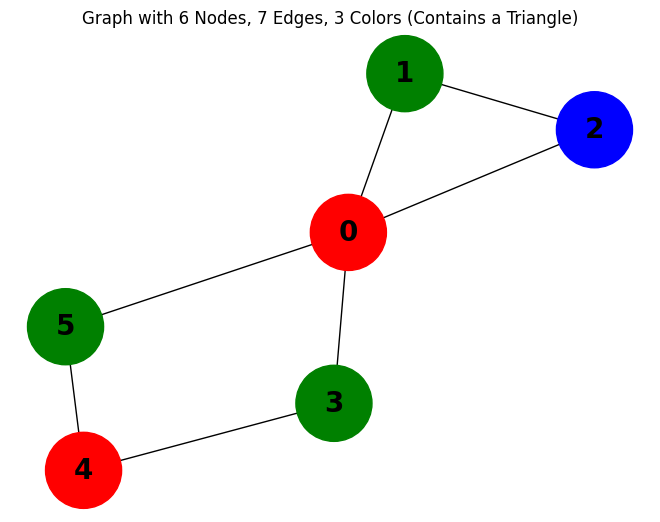

In [1]:
# Made by Google's AI Gemini

import networkx as nx
import matplotlib.pyplot as plt
import hashlib
import random

def generate_graph_with_triangle():
    """Generates a graph with 6 nodes, 7 edges, and a triangle."""
    graph = nx.Graph()
    graph.add_nodes_from(range(6))
    edges = [(0, 1), (1, 2), (2, 0), (0, 3), (3, 4), (4, 5), (0, 5)]
    graph.add_edges_from(edges)
    return graph

def get_valid_coloring(graph):
    """Returns a valid 3-coloring for the predefined graph."""
    # This coloring is specific to the graph generated by generate_graph_with_triangle
    return ['red', 'green', 'blue', 'green', 'red', 'green']

def hash_color(color):
    """Hashes a color string using SHA-256."""
    return hashlib.sha256(color.encode()).hexdigest()

def zero_knowledge_proof_coloring():
    """Demonstrates a simplified zero-knowledge proof for graph coloring."""
    print("--- Zero-Knowledge Proof for Graph Coloring ---")

    # 1. Prover generates the graph and a valid coloring (secret)
    provers_graph = generate_graph_with_triangle()
    provers_coloring = get_valid_coloring(provers_graph)
    num_nodes = provers_graph.number_of_nodes()

    # Map colors to indices for easier handling
    color_map = {'red': 0, 'green': 1, 'blue': 2}
    indexed_coloring = [color_map[color] for color in provers_coloring]

    # 2. Prover commits to the coloring
    commitment = [hash_color(str(color_index)) for color_index in indexed_coloring]
    print("\nProver's Commitment (hashes of colors for each node):")
    print(commitment)

    # 3. Verifier challenges the prover to reveal the colors of a random edge
    verifier_challenge_edge = random.choice(list(provers_graph.edges()))
    node1, node2 = verifier_challenge_edge
    print(f"\nVerifier challenges the prover to reveal the colors of edge: ({node1}, {node2})")

    # 4. Prover reveals the colors and their hashes for the challenged edge
    revealed_color1 = provers_coloring[node1]
    revealed_color2 = provers_coloring[node2]
    revealed_hash1 = hash_color(str(indexed_coloring[node1]))
    revealed_hash2 = hash_color(str(indexed_coloring[node2]))

    print(f"Prover reveals:")
    print(f"  Node {node1}: Color = {revealed_color1}, Hash = {revealed_hash1}")
    print(f"  Node {node2}: Color = {revealed_color2}, Hash = {revealed_hash2}")

    # 5. Verifier checks the proof
    print("\nVerifier checks the proof:")

    # Check if the revealed hashes match the commitment
    commitment_check1 = (revealed_hash1 == commitment[node1])
    commitment_check2 = (revealed_hash2 == commitment[node2])
    print(f"  Hash for Node {node1} matches commitment: {commitment_check1}")
    print(f"  Hash for Node {node2} matches commitment: {commitment_check2}")

    # Check if the colors of the adjacent nodes are different
    different_color_check = (revealed_color1 != revealed_color2)
    print(f"  Revealed colors for Node {node1} and Node {node2} are different: {different_color_check}")

    if commitment_check1 and commitment_check2 and different_color_check:
        print("\nVerifier is convinced (for this edge) that the prover knows a valid coloring.")
    else:
        print("\nVerifier is NOT convinced (for this edge).")

    # --- Optional: Visualize the graph with the coloring ---
    visualize_graph = input("\nDo you want to visualize the graph with the coloring? (yes/no): ").lower()
    if visualize_graph == 'yes':
        pos = nx.spring_layout(provers_graph)
        nx.draw(provers_graph, pos, with_labels=True, node_color=provers_coloring, node_size=3000, font_size=20, font_weight='bold')
        plt.title("Graph with 6 Nodes, 7 Edges, 3 Colors (Contains a Triangle)")
        plt.show()

if __name__ == "__main__":
    zero_knowledge_proof_coloring()

**Explanation of the Zero-Knowledge Proof Script:**

1.  **`generate_graph_with_triangle()` and `get_valid_coloring()`:** These functions are taken directly from the previous script to create the specific graph structure and a valid 3-coloring for it. The prover knows this graph and its coloring.

2.  **`hash_color(color)`:** This function takes a color string as input and returns its SHA-256 hash. This is used for the commitment phase.

3.  **`zero_knowledge_proof_coloring()`:** This function simulates the zero-knowledge proof process:

    * **Prover's Setup:** The prover generates the graph and obtains a valid coloring (which they keep secret from the verifier). The colors are then mapped to numerical indices (0 for red, 1 for green, 2 for blue) for easier hashing.

    * **Commitment:** The prover computes the hash of the color index for each node in the graph. These hashes form the commitment to the coloring. The prover sends this list of hashes to the verifier. The verifier only sees these hashes and cannot directly determine the actual colors.

    * **Challenge:** The verifier randomly selects an edge from the graph and asks the prover to reveal the colors of the two nodes connected by that edge. This randomness prevents the prover from selectively revealing information.

    * **Response:** The prover reveals the actual colors of the two nodes of the challenged edge and also provides the hashes of these colors.

    * **Verification:** The verifier performs the following checks:
        * **Hash Verification:** The verifier computes the hash of the revealed colors (after indexing them) and checks if these hashes match the corresponding hashes in the commitment received earlier. This ensures that the prover is actually revealing the colors they committed to.
        * **Color Difference:** The verifier checks if the two revealed colors are different. This verifies that the coloring is valid for that specific edge.

    * **Confidence:** By repeating this challenge-response process multiple times with different randomly chosen edges, the verifier can gain a high degree of confidence that the prover knows a valid 3-coloring of the entire graph without learning the coloring itself. In this simplified example, the process is done only once.

4.  **Visualization (Optional):** The script asks the user if they want to visualize the graph with the coloring after the proof demonstration.

**How this demonstrates a zero-knowledge property (in a simplified way):**

* **Completeness:** If the prover knows a valid coloring, they can always provide the correct colors and hashes for any challenged edge, and the verifier will be convinced (for that edge).
* **Soundness:** If the prover doesn't know a valid coloring, they would have a very low probability of successfully convincing the verifier over multiple rounds of the challenge-response process.
* **Zero-Knowledge:** The verifier only learns the colors of the two nodes for the specific challenged edge. If the process is repeated, the verifier learns the colors of a few edges, but not the complete coloring of the entire graph. With proper cryptographic techniques in a real ZKP, the verifier would learn absolutely nothing beyond the fact that the prover knows a valid coloring.

**To run this script:**

1.  Make sure you have `networkx`, `matplotlib`, and `hashlib` installed (`pip install networkx matplotlib`).
2.  Save the code as a Python file (e.g., `zkp_graph_coloring.py`).
3.  Run the script from your terminal: `python zkp_graph_coloring.py`

The script will simulate the zero-knowledge proof process and print the steps and verification results. You can choose to visualize the graph at the end.